In [61]:
import pandas as pd
import math
import scipy.stats
import seaborn as sns
import statistics
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [62]:
df1 = pd.read_csv("dataset_ML_proj_Heartrate.csv")
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df1.shape

(303, 14)

In [64]:
# Understanding the Dataset
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### It can be observed that ALL Dataset is either integer or float values (numerical type) AND no categorical features

In [65]:
df1.shape

(303, 14)

In [66]:
#Identify  variables with null values 
df1.isnull().mean().sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

### It can be observed that NO missing values reported in data above

In [67]:
# Quick statistical overview of numerical data
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Above table show the distribution of data and measure of central tendencies

In [68]:

df1.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [69]:
# Dropping duplicate features

#from feature_engine.selection import DropConstantFeatures
#duplicates = DropConstantFeatures()
df2 = df1.drop_duplicates()
df2.shape

(302, 14)

## we can see that only 1 duplicate row is removed

In [70]:
df1.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [71]:
df1.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [72]:
df1.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [73]:
df1.std().sort_values(ascending=False)

chol        51.830751
thalach     22.905161
trestbps    17.538143
age          9.082101
oldpeak      1.161075
cp           1.032052
ca           1.022606
slope        0.616226
thal         0.612277
restecg      0.525860
target       0.498835
exang        0.469794
sex          0.466011
fbs          0.356198
dtype: float64

In [74]:
#skewness
df1.skew().sort_values(ascending=False)

fbs         1.986652
ca          1.310422
oldpeak     1.269720
chol        1.143401
exang       0.742532
trestbps    0.713768
cp          0.484732
restecg     0.162522
target     -0.179821
age        -0.202463
thal       -0.476722
slope      -0.508316
thalach    -0.537410
sex        -0.791335
dtype: float64

### It can be observed that few variable such as fbs and ca are bit skewed and have outliers

# Generating CORRELATION MATRIX

<AxesSubplot:>

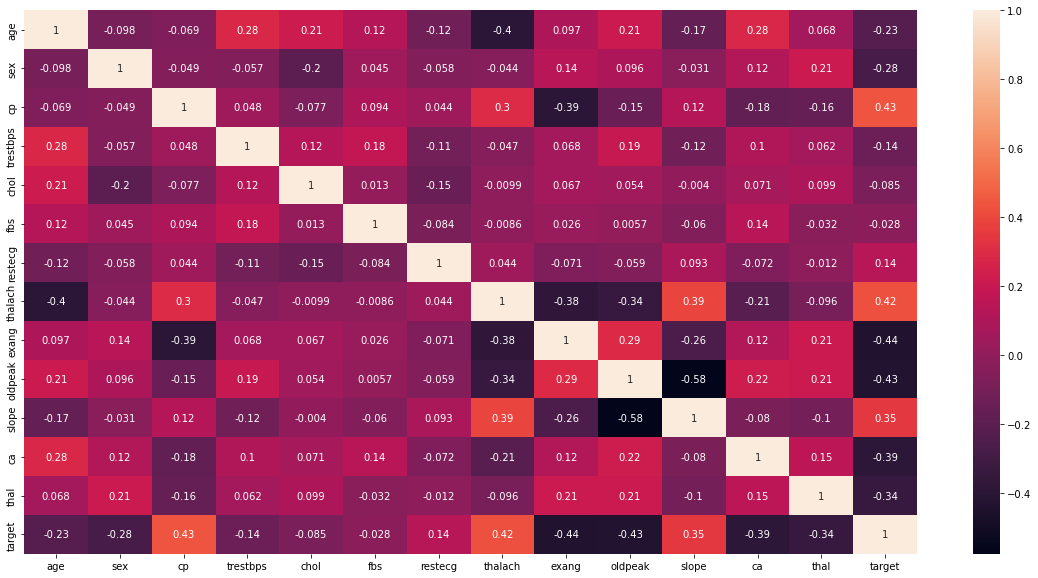

In [75]:
sns.heatmap(df1.corr(), annot=True)

### FROM ABOVE -- Age  ~25% correlation w/ Target-- Moderately CORELATED
###            -- TRESBPS  ~15% correlation w/ Target -- NOT HIGHLY CORELATED
###            -- CHOL  ~1% correlation w/ Target -- NOT HIGHLY CORELATED
###           THAL ~ 35% correlation w/ Target --  HIGHLY CORELATED
###           SLOPE ~35% correlation w/ Target --  HIGHLY CORELATED

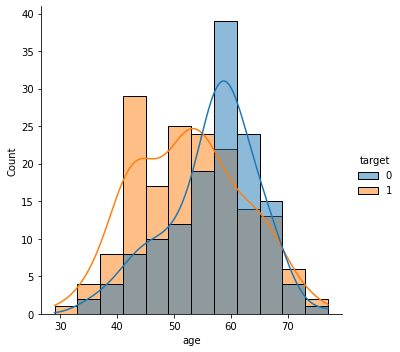

In [76]:
#sns.displot(df, x='sit-ups counts', hue = df['gender'], kde=True)
sns.displot(df1, x='age', hue= df1['target'], kde=True)

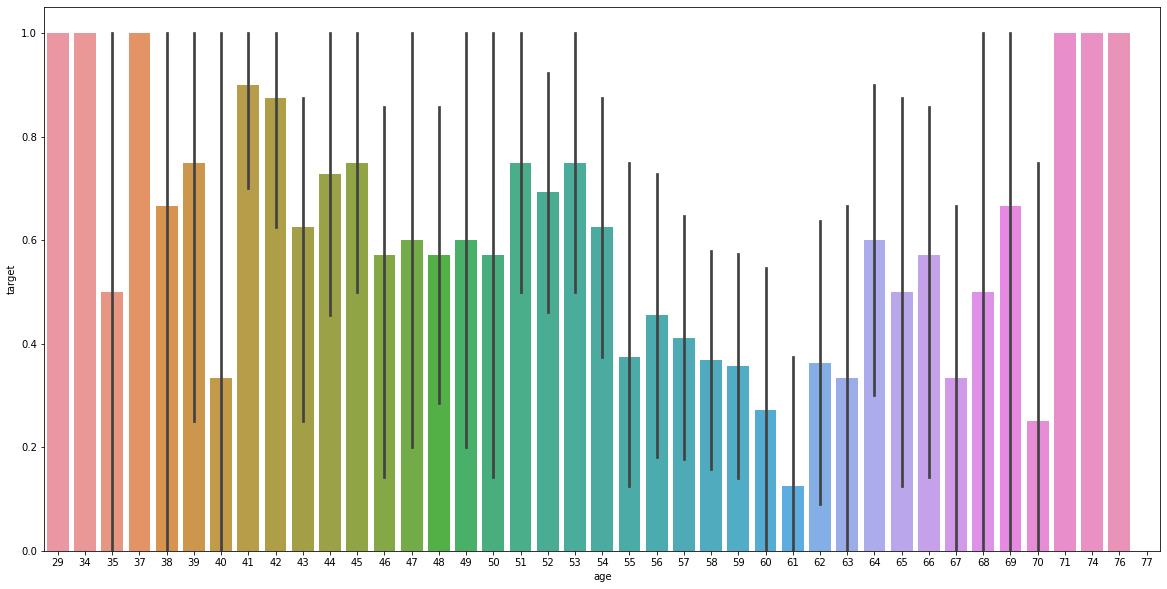

In [77]:
ax = sns.barplot(x= 'age', y='target', data = df1)

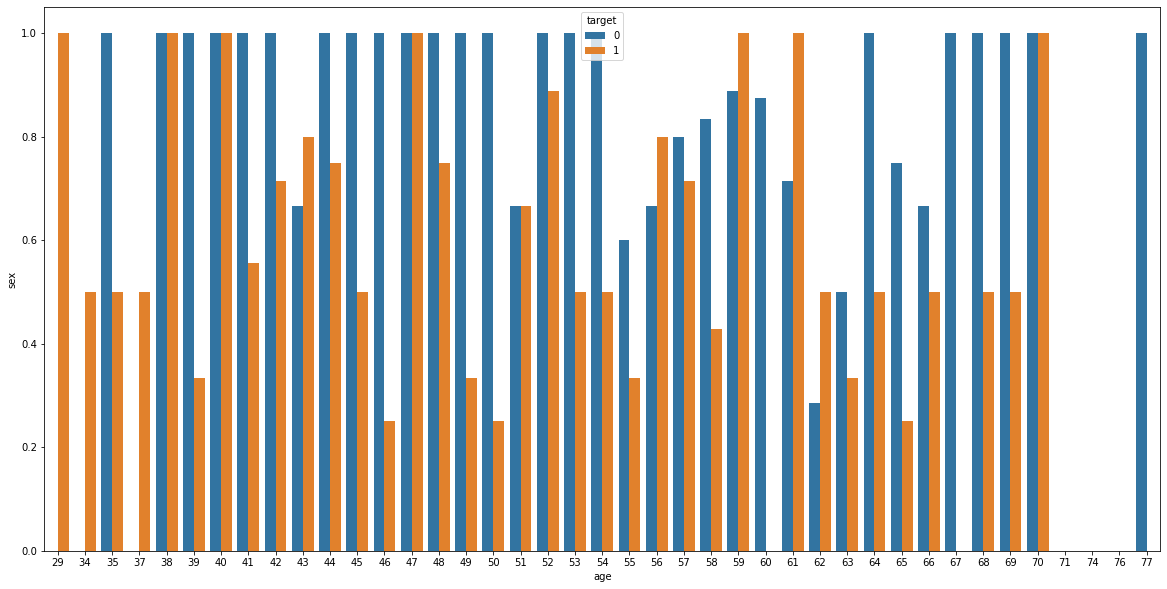

In [78]:
ax = sns.barplot(x= 'age', y='sex', data = df1, ci=None, hue = 'target')

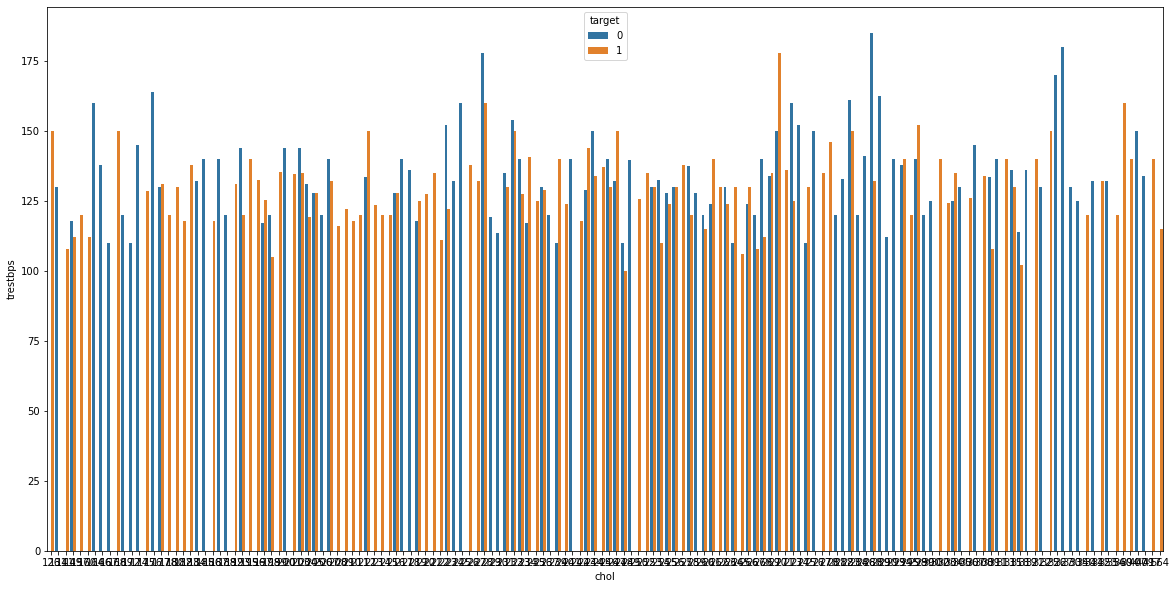

In [79]:
ax = sns.barplot(x= 'chol', y='trestbps', data = df1, ci=None, hue = 'target')

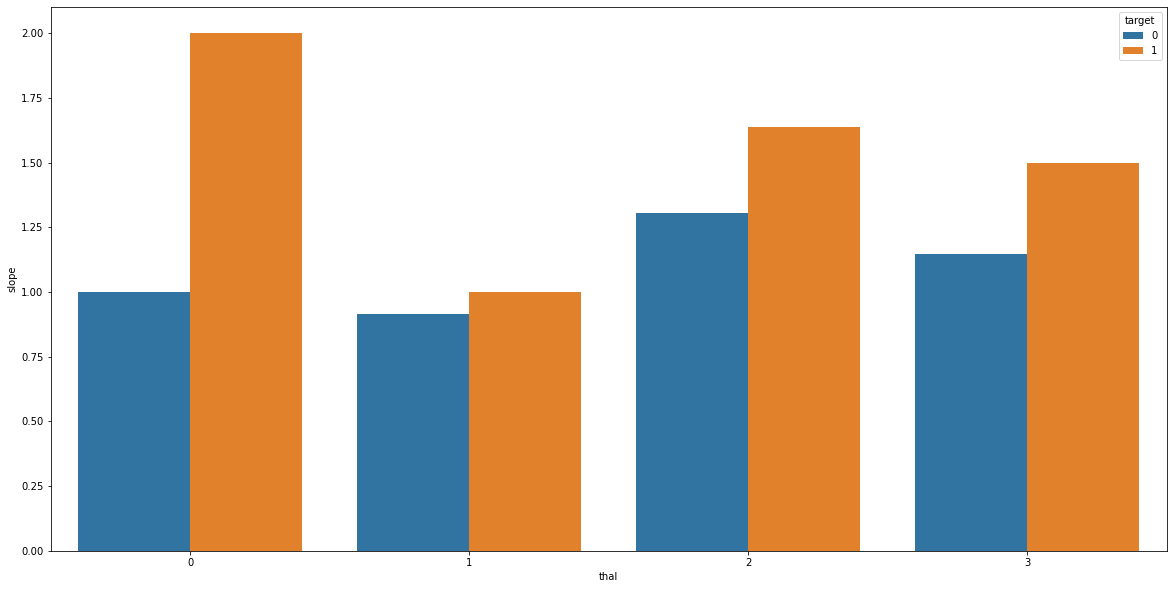

In [80]:
ax = sns.barplot(x= 'thal', y='slope', data = df1, ci=None, hue = 'target')

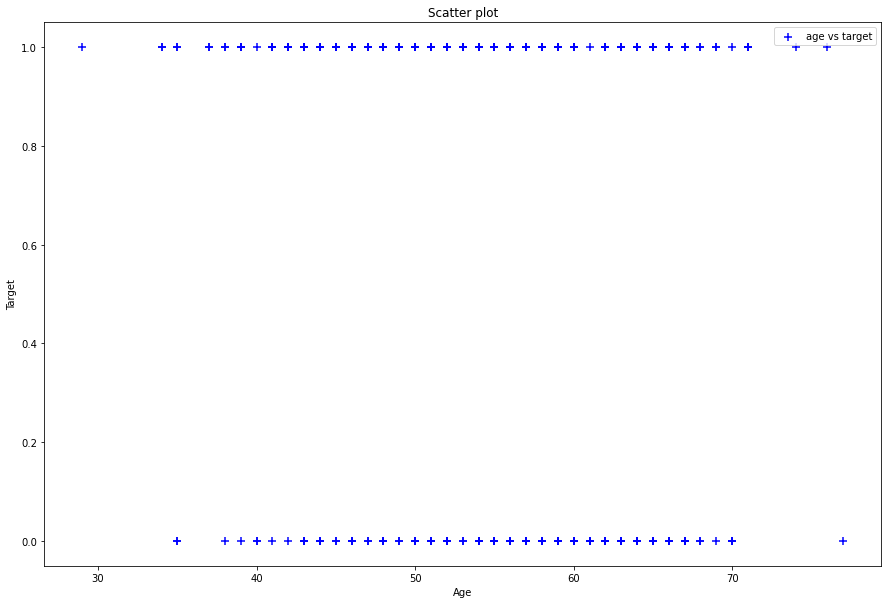

In [81]:
# Scatter plot to find Target V/S age


matplotlib.rcParams['figure.figsize'] = (15,10)
plt.scatter(df1.age, df1.target, color='blue', label='age vs target', s=50, marker='+')
    #plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
plt.xlabel("Age")
plt.ylabel("Target")
plt.title("Scatter plot")
plt.legend()

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

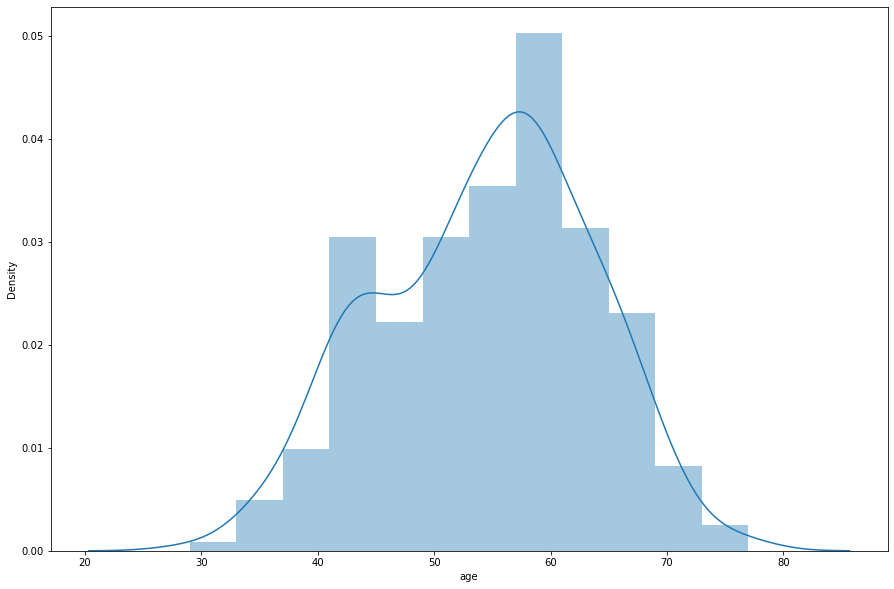

In [82]:
sns.distplot(df1['age'])

Text(0, 0.5, 'Count')

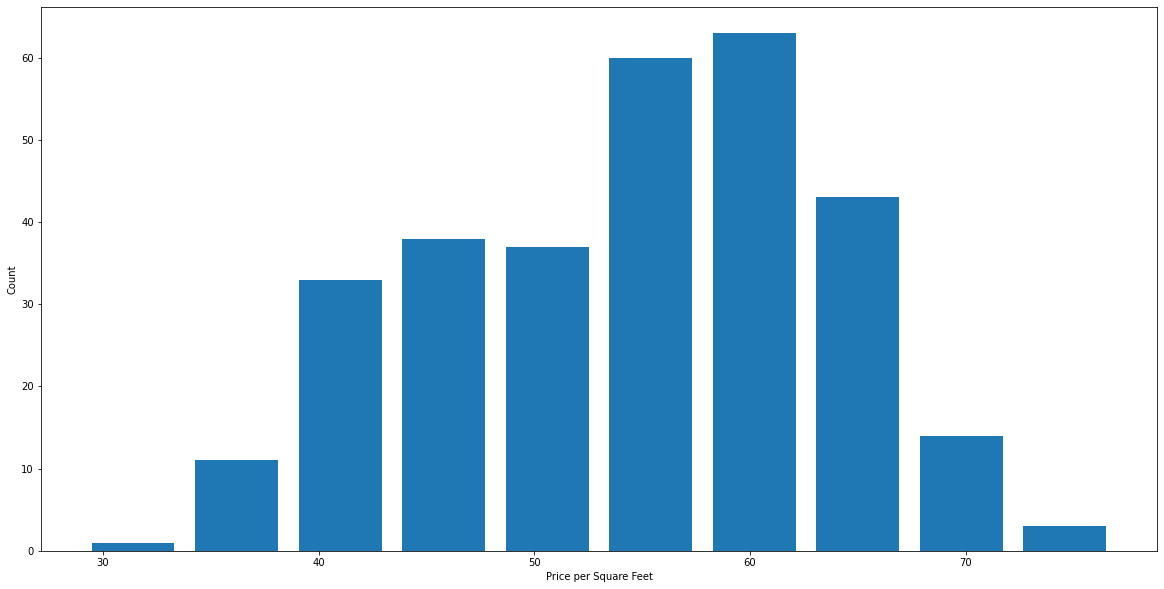

In [83]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df1.age, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [84]:
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## PAIR PLOT

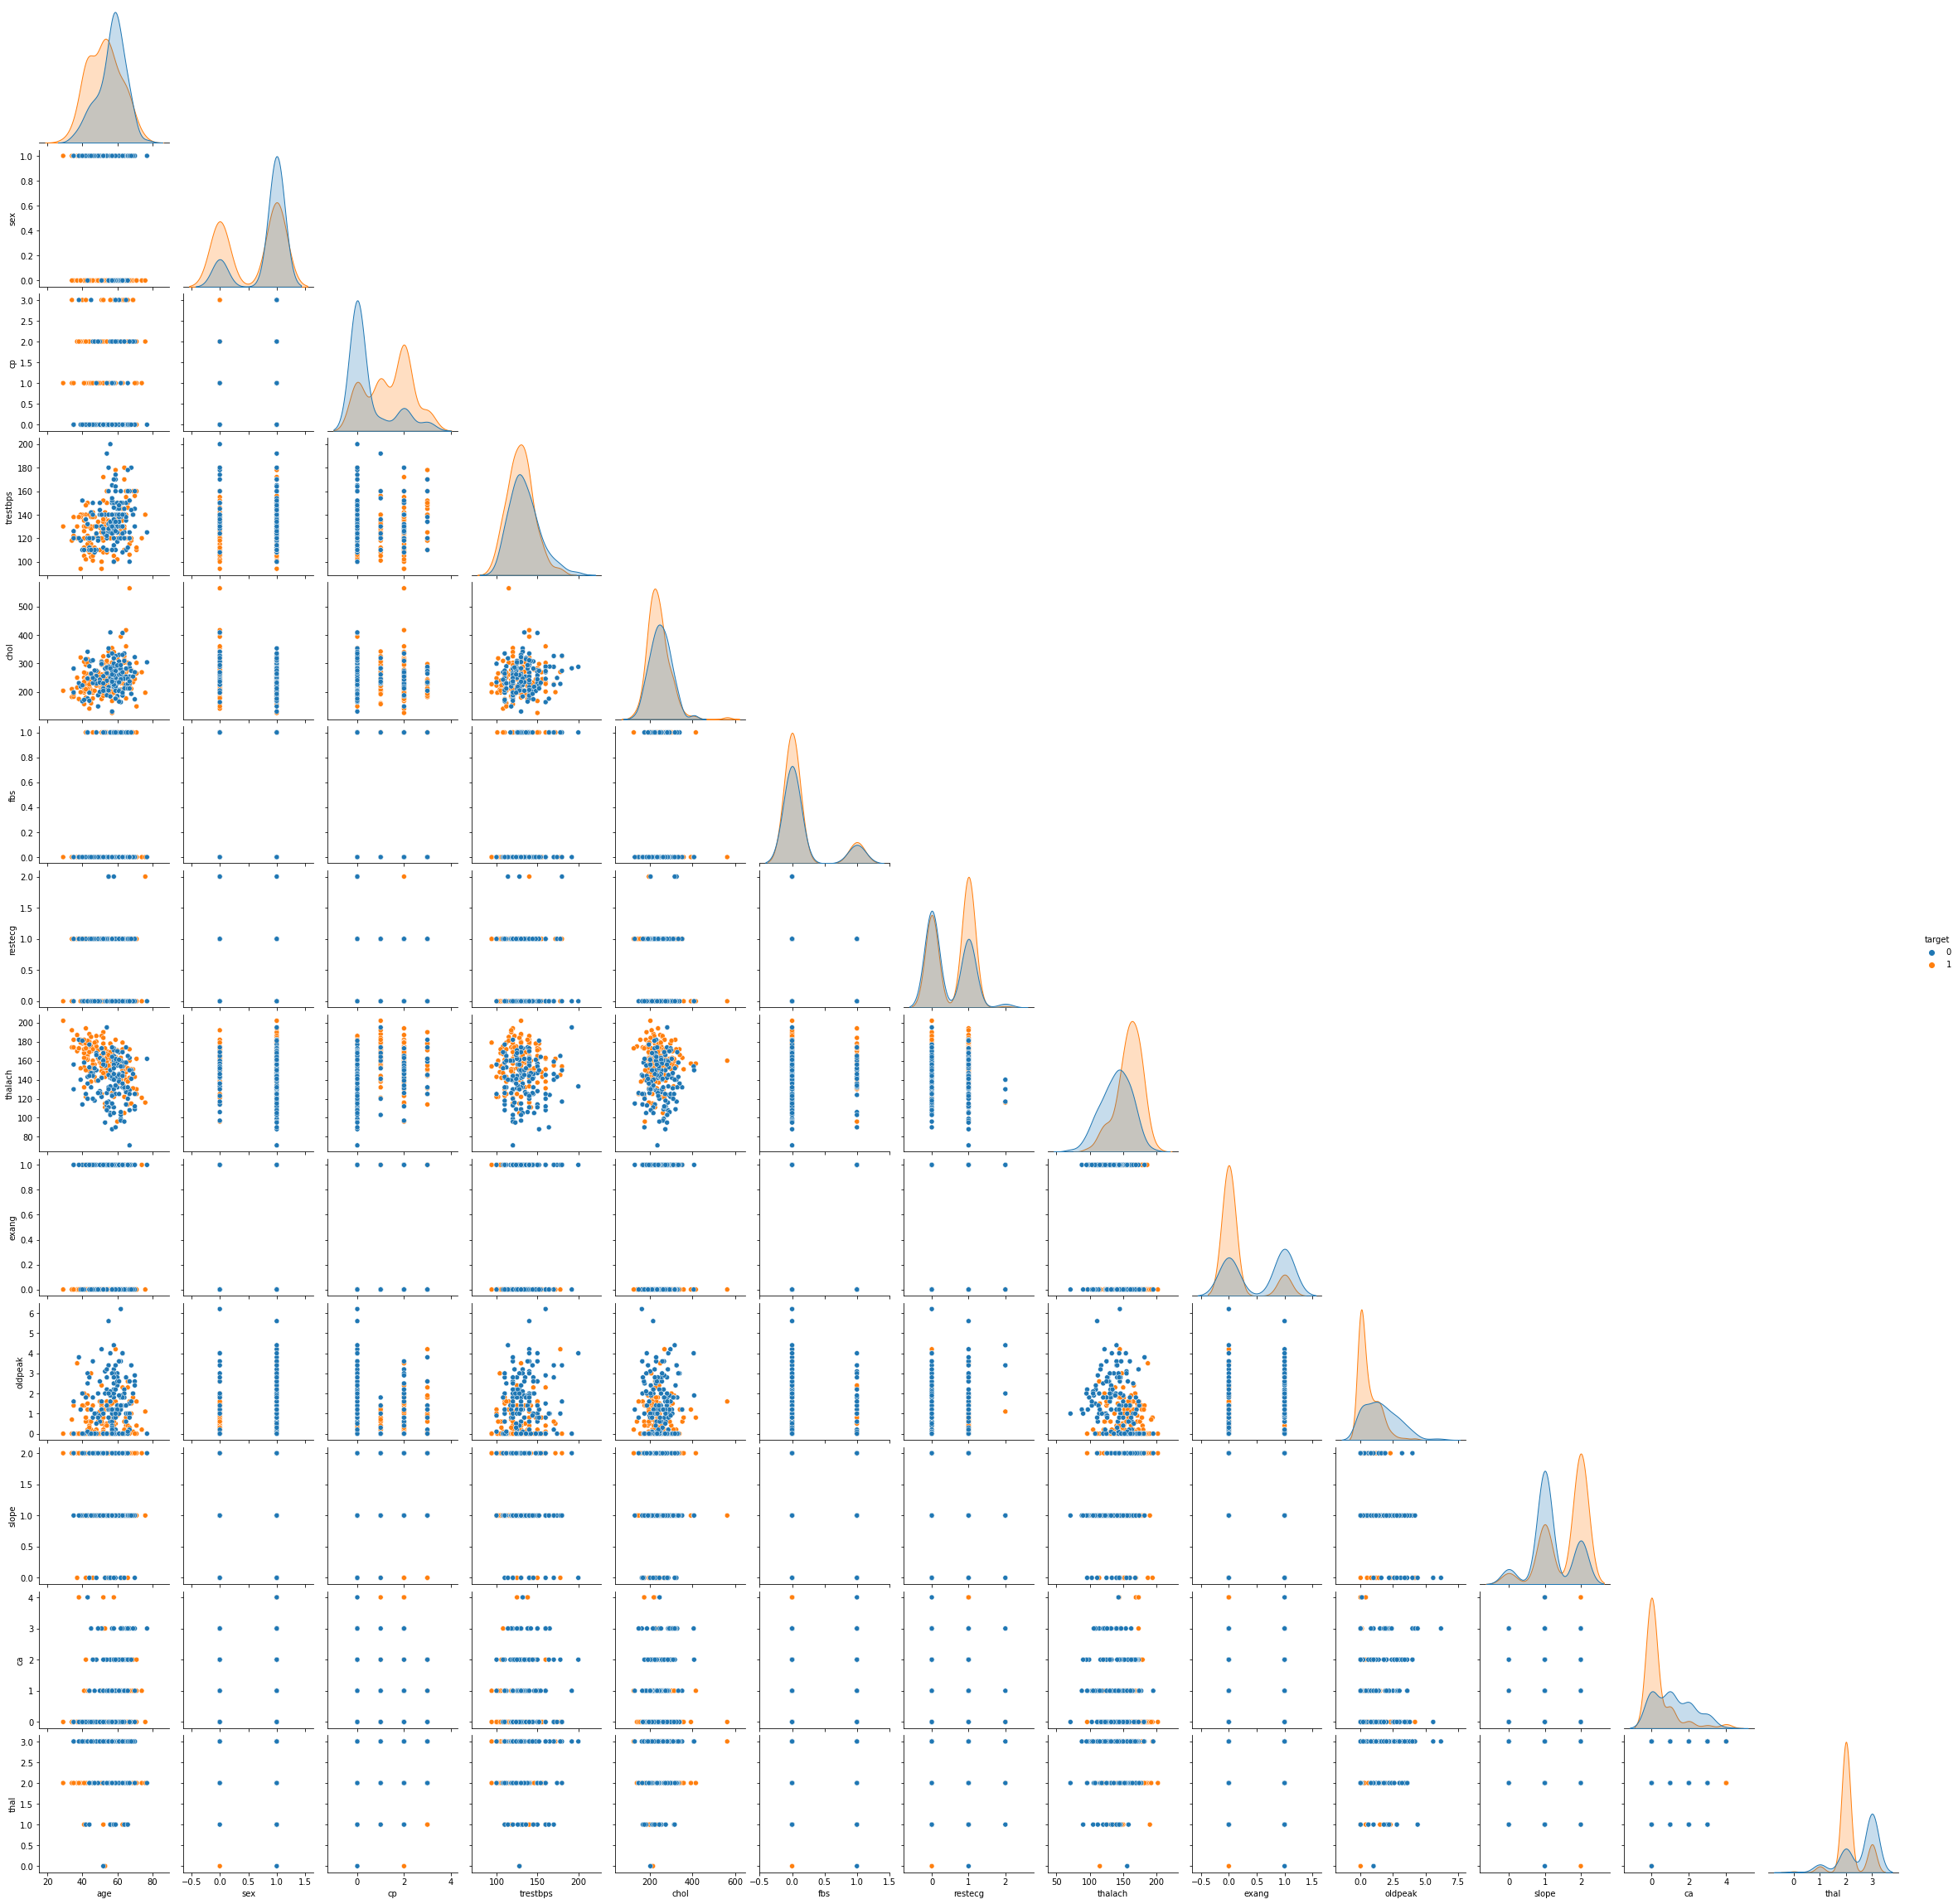

In [85]:
#sns.pairplot(df1.age, hue=df1['target'])
sns.pairplot(df1, hue='target', corner=True)

In [86]:
# CREATING MACHINE LEARNING MODELS

X = df1.drop('target', axis='columns')
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [87]:
y = df1.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [89]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.4186393744543344

In [90]:
# Creating shuffle split to Randomise the variables for cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)

cross_val_score(LinearRegression(), X, y, cv=cv)



array([0.53744943, 0.48432274, 0.37611742, 0.43237217, 0.41071221])

## Linear Reg is not a good indicator for this model

In [91]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [92]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [93]:
# Checking accuracy comparing x_test --model predicted value with actual values --ytest

model.score(X_test, y_test)

0.7704918032786885

In [94]:
# Creating shuffle split to Randomise the variables for cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)

cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=cv)


array([0.83606557, 0.85245902, 0.7704918 , 0.7704918 , 0.85245902])

In [95]:
# Confusion Matrix - plots truth on 'y' axis and confusion on 'x' axis
y_predicted = model.predict(X_test)

In [96]:

# First supply 'truth' and then supply 'prediction'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[26,  9],
       [ 5, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

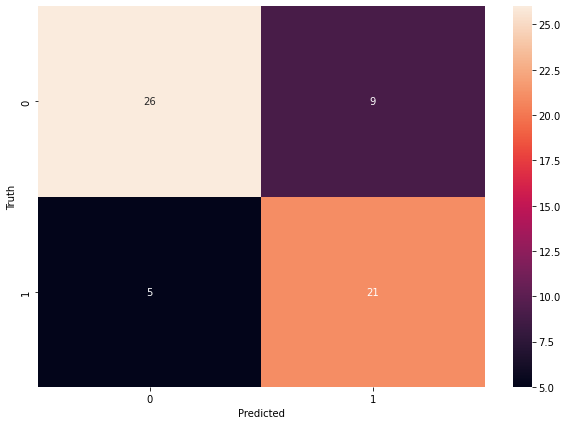

In [97]:
# code for confusion matrix visualization - heatmap

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Better model accuracy with logistic regression showing 5 differnt sets and accuracy using crosss validation

In [98]:
# Random Forrest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [99]:
model.score(X_test, y_test)

0.7868852459016393

In [100]:
# Creating shuffle split to Randomise the variables for cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier(), X, y, cv=cv)


array([0.85245902, 0.80327869, 0.78688525, 0.80327869, 0.90163934])

## Also Better model accuracy with Random Forest showing 5 differnt sets and accuracy using crosss validation

In [101]:
# Confusion Matrix - plots truth on 'y' axis and confusion on 'x' axis
y_predicted = model.predict(X_test)

In [102]:

# First supply 'truth' and then supply 'prediction'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[27,  8],
       [ 5, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

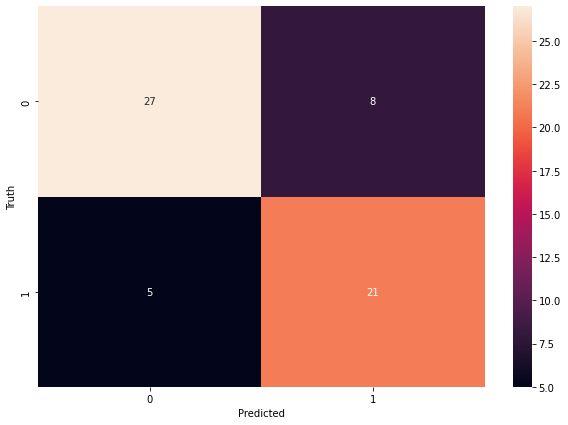

In [103]:
# code for confusion matrix visualization - heatmap

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
# otherway

In [105]:
y_predict = model.predict(X_test)

In [106]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.7868852459016393
[[27  8]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [107]:

# First supply 'truth' and then supply 'prediction'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[27,  8],
       [ 5, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

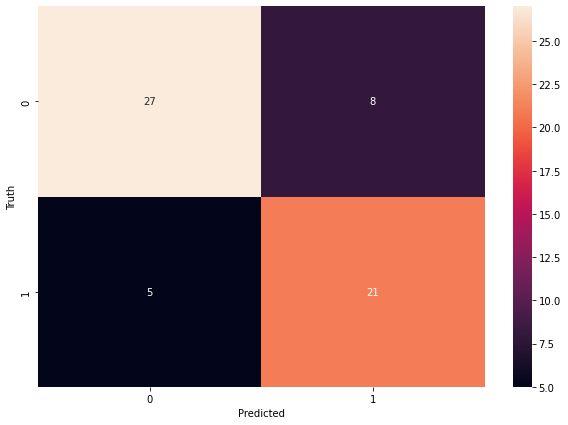

In [108]:
# code for confusion matrix visualization - heatmap

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using PCA to leverage the standard error

In [109]:
# Scaling the features before applying machine learning model

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8688524590163934

In [113]:
X.shape

(303, 13)

In [114]:
#PCA -- retain 95% of useful features and create new dimension

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(303, 3)

In [115]:
# PCA reducing columns from 14 to 3

In [116]:
#X_pca
pca.explained_variance_ratio_

array([0.7475642 , 0.15037022, 0.08459685])

In [117]:
pca.n_components_

3

In [118]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [119]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6885245901639344

In [120]:
# However when reducing componenets for faster computation accuracy decreases